# Análisis univariado y multivariado

Se usarán las siguientes variables para el análisis:
* **FECHA_INICIO_ACTIVIDADES:** Muestra el inicio de actividades del contribuyente, para el análisis se pueden establecer periodos (presidenciales, municipales, etc) y obtener una relación entre aquel y la cantidad de nuevos negocios.
* **FECHA_SUSPENSION_DEFINITIVA:** Fechas en las que un negocio dejó de operar. El análisis de esta variable nos ayudará a determinar en qué periodo temporal desaparecieron negocios, con lo que podremos analizar las medidas económicas tomadas por las instituciones alrededor de aquel periodo
* **ACTIVIDAD_ECONOMICA:** Define el tipo de actividad que el contribuyente ejerce. Con esta variable podemos generar grupos y poder profundizar el análisis
* **NUMERO_ESTABLECIMIENTO:** Define la cantidad de sucursales que el contribuyente tiene. Junto con la variable 


In [1]:
import csv  # library csv
import pandas as pd  # library pandas
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
FILE_NAME = 'GUAYAQUIL.csv'

In [2]:
guayaquil = pd.read_csv(FILE_NAME, sep=',', encoding='utf-8', error_bad_lines=False, index_col=0)  # reading GUAYAQUIL file

In [3]:
def convert_date(row, column):  # convert date 
    date = row[column]
    converted_dt = datetime.datetime.strptime(date, '%d/%m/%Y')
    dateObj = converted_dt.date()
    return dateObj

### Ejemplo de visualizacion con variable FECHA_INICIO_ACTIVIDADES

In [4]:
df2 = guayaquil.dropna(subset=['FECHA_INICIO_ACTIVIDADES'])

In [5]:
df2['FECHA_INICIO_ACTIVIDADES'] = df2.apply(lambda row: convert_date(row, 'FECHA_INICIO_ACTIVIDADES'), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
guti_per_ini = df2[(df2['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2003,1,15)) & (df2['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2005,4,20)) ].assign(PRESIDENTE='Gutierrez')

In [7]:
rc_per_ini = df2[(df2['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2007,1,15)) & (df2['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2009,8,10)) ].assign(PRESIDENTE='Correa')

In [8]:
cdf = pd.concat([guti_per_ini, rc_per_ini])

[Text(0,0.5,'NUEVOS CONTRIBUYENTES'),
 Text(0.5,1,'Nuevos Contribuyentes por Presidente')]

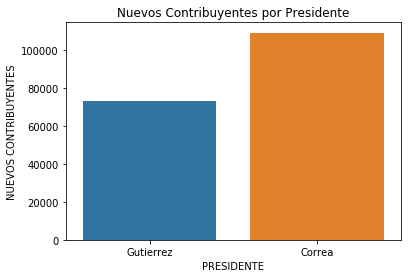

In [9]:
ax = sns.countplot(x='PRESIDENTE', data=cdf)
ax.set(ylabel='NUEVOS CONTRIBUYENTES', title='Nuevos Contribuyentes por Presidente')

### Ejemplo de visualizacion con variable FECHA_SUSPENSION_DEFINITIVA

In [10]:
df3 = guayaquil.dropna(subset=['FECHA_SUSPENSION_DEFINITIVA'])

In [11]:
df3['FECHA_SUSPENSION_DEFINITIVA'] = df3.apply(lambda row: convert_date(row, 'FECHA_SUSPENSION_DEFINITIVA'), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
guti_per_susp = df3[(df3['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2003,1,15)) & (df3['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2005,4,20)) ].assign(PRESIDENTE='Gutierrez')

In [13]:
rc_per_susp = df3[(df3['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2007,1,15)) & (df3['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2009,8,10)) ].assign(PRESIDENTE='Correa')

In [14]:
cdf_susp = pd.concat([guti_per_susp, rc_per_susp])

[Text(0,0.5,'SUSPENCIONES DEFINITIVAS'),
 Text(0.5,1,'Suspencion de Contribuyentes por Presidente')]

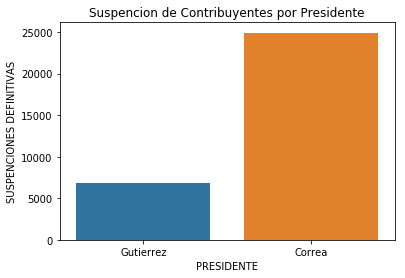

In [15]:
ax = sns.countplot(x='PRESIDENTE', data=cdf_susp)
ax.set(ylabel='SUSPENCIONES DEFINITIVAS', title='Suspencion de Contribuyentes por Presidente')

### Ejemplo de visualizacion con variable ACTIVIDAD_ECONOMICA

In [16]:
df4 = guayaquil.dropna(subset=['ACTIVIDAD_ECONOMICA'])

In [17]:
top10 = df4.groupby('ACTIVIDAD_ECONOMICA', as_index=False).count().sort_values(['NUMERO_RUC'], ascending=False)[:10]
top10['ACTIVIDAD_ECONOMICA'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:35], axis=1)

[Text(0,0,'RESTAURANTES, CEVICHERÍAS, PICANTER'),
 Text(0,0,'VENTA AL POR MENOR DE GRAN VARIEDAD'),
 Text(0,0,'INTERMEDIARIOS DEL COMERCIO DE COMB'),
 Text(0,0,'ACTIVIDADES DE LIMPIABOTAS (BETUNER'),
 Text(0,0,'OTRAS ACTIVIDADES PROFESIONALES, CI'),
 Text(0,0,'INTERMEDIACIÓN EN LA COMPRA, VENTA '),
 Text(0,0,'VENTA AL POR MENOR DE GRAN VARIEDAD'),
 Text(0,0,'COMPRA - VENTA, ALQUILER Y EXPLOTAC'),
 Text(0,0,'CONSTRUCCIÓN DE TODO TIPO DE EDIFIC')]

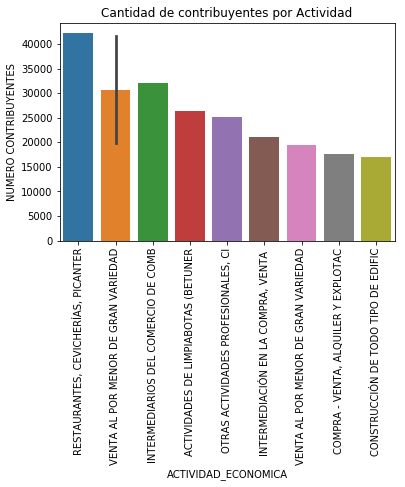

In [18]:
ax = sns.barplot(y='NUMERO_RUC', x='ACTIVIDAD_ECONOMICA', data=top10)
ax.set(ylabel='NUMERO CONTRIBUYENTES', title='Cantidad de contribuyentes por Actividad')
ax.set_xticklabels(labels=top10['ACTIVIDAD_ECONOMICA'],rotation=90)

### Ejemplo visualizacion con variable NUMERO_ESTABLECIMIENTO

In [19]:
df5 = guayaquil.dropna(subset=['ACTIVIDAD_ECONOMICA', 'NUMERO_ESTABLECIMIENTO'])

In [40]:
suma_establecimientos = df5.groupby('ACTIVIDAD_ECONOMICA', as_index=False)['NUMERO_ESTABLECIMIENTO'].sum().sort_values(['NUMERO_ESTABLECIMIENTO'], ascending=False)

In [41]:
top10_numero = suma_establecimientos[:10]
top10_numero['ACTIVIDAD_ECONOMICA'] = top10_numero.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:50], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
top10_numero

,ACTIVIDAD_ECONOMICA,NUMERO_ESTABLECIMIENTO
425,DESEMPEÑO DE LAS FUNCIONES EJECUTIVAS Y LEGISL...,181276
154,ACTIVIDADES DE LAS ORGANIZACIONES RELIGIOSAS O...,113414
1531,"VENTA AL POR MAYOR DE PRODUCTOS FARMACÉUTICOS,...",75149
1016,"INTERMEDIARIOS DEL COMERCIO DE COMBUSTIBLES, M...",74916
1232,"RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETE...",67562
1603,VENTA AL POR MENOR DE PRODUCTOS NATURISTAS EN ...,56511
1601,VENTA AL POR MENOR DE PRODUCTOS FARMACÉUTICOS ...,56464
310,"ALQUILER CON FINES OPERATIVOS, SIN OPERADORES,...",53350
1575,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...,45335
1564,VENTA AL POR MENOR DE ELECTRODOMÉSTICOS EN EST...,31863


[Text(0,0,'DESEMPEÑO DE LAS FUNCIONES EJECUTIVAS Y LEGISLATIV'),
 Text(0,0,'ACTIVIDADES DE LAS ORGANIZACIONES RELIGIOSAS O DE '),
 Text(0,0,'VENTA AL POR MAYOR DE PRODUCTOS FARMACÉUTICOS, INC'),
 Text(0,0,'INTERMEDIARIOS DEL COMERCIO DE COMBUSTIBLES, MINER'),
 Text(0,0,'RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETERÍAS'),
 Text(0,0,'VENTA AL POR MENOR DE PRODUCTOS NATURISTAS EN ESTA'),
 Text(0,0,'VENTA AL POR MENOR DE PRODUCTOS FARMACÉUTICOS EN E'),
 Text(0,0,'ALQUILER CON FINES OPERATIVOS, SIN OPERADORES, DE '),
 Text(0,0,'VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCTOS E'),
 Text(0,0,'VENTA AL POR MENOR DE ELECTRODOMÉSTICOS EN ESTABLE')]

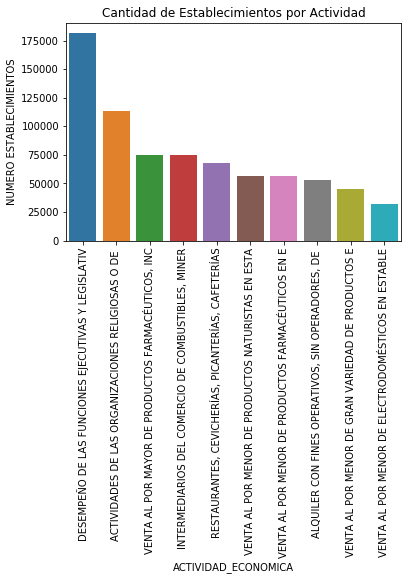

In [43]:
ax = sns.barplot(y='NUMERO_ESTABLECIMIENTO', x='ACTIVIDAD_ECONOMICA', data=top10_numero)
ax.set(ylabel='NUMERO ESTABLECIMIENTOS', title='Cantidad de Establecimientos por Actividad')
ax.set_xticklabels(labels=top10_numero['ACTIVIDAD_ECONOMICA'],rotation=90)